# **EDA(1주차 세션)**

해당 데이터셋 : https://www.kaggle.com/datasets/sakshisatre/tips-dataset

하단 셀을 실행하여 데이터셋을 다운받아주세요.

In [1]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("tips")
df.to_csv("tips.csv", index=False)

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 문제 1) Tips 데이터를 구체적으로 분석하는 문제입니다.


(1) Tips 데이터의 “분석 목적”을 1문장으로 정의하고,

답안 : 식사 금액(total_bill), 요일, 시간, 인원수 등의 독립변수들이 종속변수인 팁(tip) 금액에 미치는 영향을 파악하고 이를 예측하기 위함이다.











(2) 독립변수들을 (연속형/범주형) 으로 분류하고, 각 타입에 맞는 EDA 방법(Ex. boxplot, countplot, 히스토그램)을 1개씩 매칭하여 표를 채워주세요.

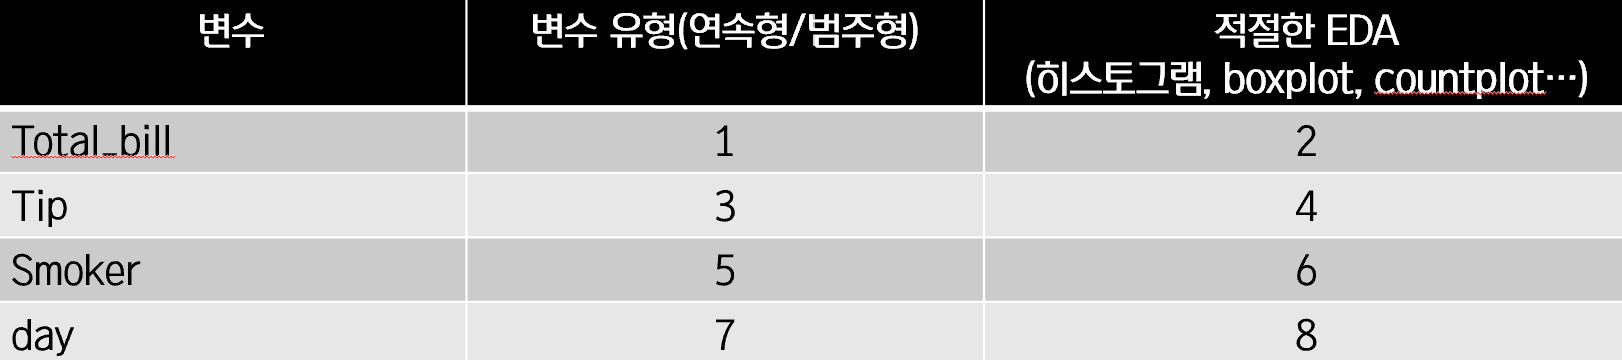


1: 연속형

2: 히스토그램 또는 Distplot

3: 연속형

4: 히스토그램 또는 Boxplot

5: 범주형

6: Countplot

7: 범주형

8: Countplot

Q1. total_bill 분포가 오른쪽으로 치우치면 분석 또는 모델링에 어떤 문제가 생기는지 간략히 설명하세요.





답안: 데이터가 오른쪽으로 긴 꼬리(Right Skewed)를 가질 경우, 평균이 중앙값보다 커져 대푯값이 왜곡될 수 있다. 또한, 선형 회귀 분석과 같은 모수적 모델을 사용할 때 오차항의 정규성 가정을 위배하게 되어 모델의 신뢰도가 떨어지거나 예측 성능이 저하될 수 있다.

Q2. total_bill과 tip을 산점도로 그렸을 때 양의 관계가 보인다면 이것이 의미하는 바가 무엇인지 쓰세요.

답안: 식사 금액(total_bill)이 증가할수록 팁(tip) 금액 또한 통계적으로 유의미하게 증가하는 경향(양의 상관관계)이 있음을 의미한다.

Q3. Boxplot에서 극단적으로 큰 total_bill 값이 관측되었다고 할 때,
아래 중 가장 적절하다고 생각하는 방법 1개를 선택하고 이유를 쓰세요.

① 삭제

② 로그 변환

③ 그대로 둔다

답안 : ② 로그 변환

이유 : 식사 금액과 같은 금융 데이터는 자연적으로 오른쪽으로 치우친 분포를 갖는 경우가 많아 단순히 큰 값을 이상치로 보아 삭제하면 정보의 손실이 발생한다. 로그 변환을 수행하면 데이터의 스케일을 줄여 이상치의 영향력을 완화하는 동시에, 분포를 정규분포에 가깝게 보정하여 모델의 안정성을 높일 수 있기 때문이다.

# 문제 2) Tips 데이터셋에 대한 EDA 파이프라인을 완성하세요.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
(244, 7)
duplicates: 1
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


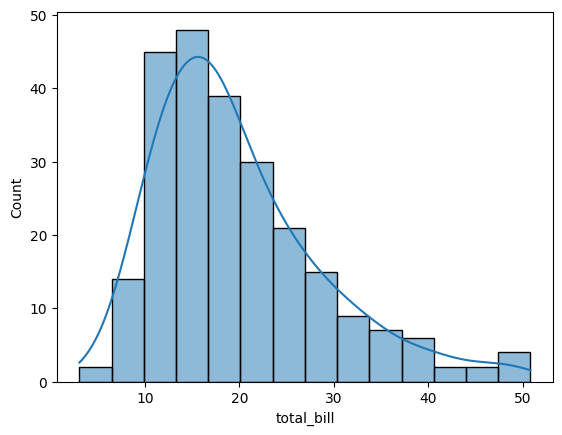

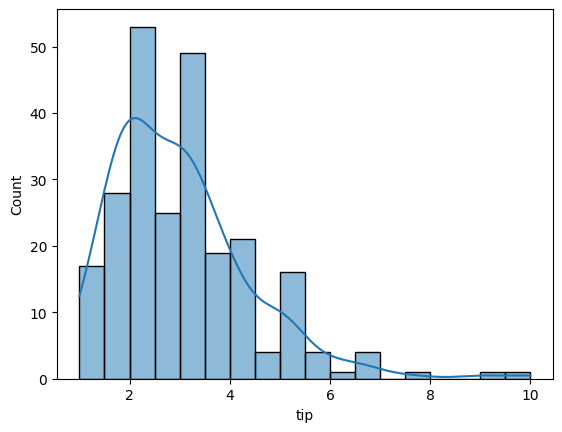

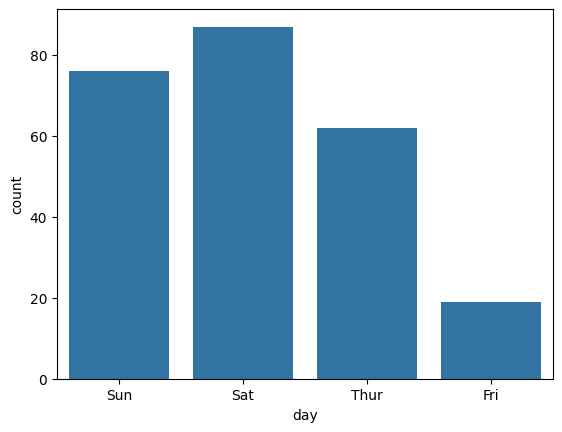

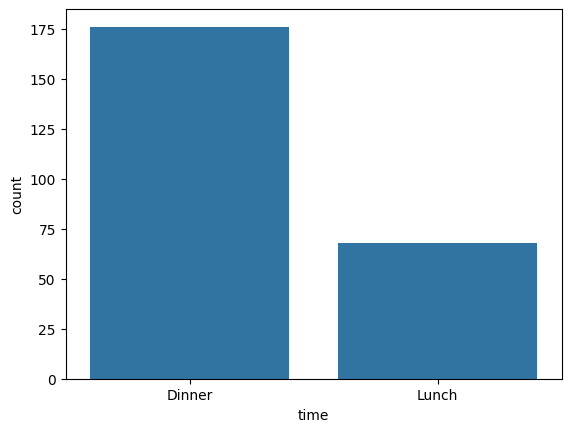

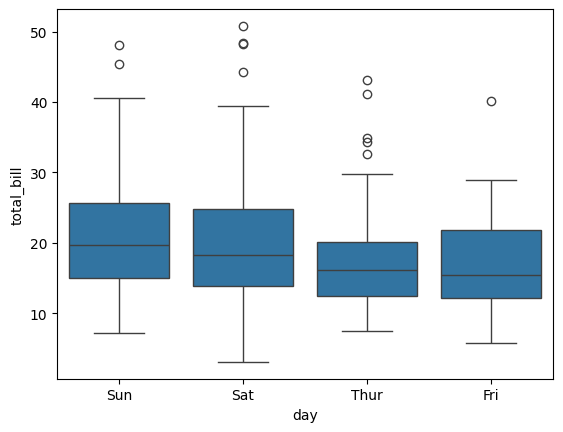

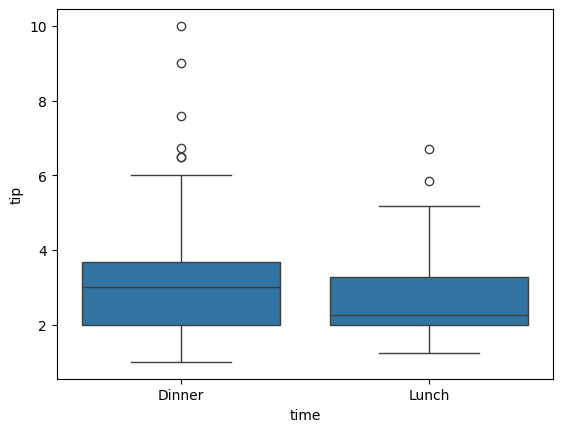

           mean  median  count
day                           
Sun   21.410000   19.63     76
Sat   20.441379   18.24     87
Thur  17.682742   16.20     62
Fri   17.151579   15.38     19


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("tips.csv")

# 1) 구조/요약 확인
df.head()
df.info()
print(df.shape)

# 2) 중복행 확인 및 개수 출력
dup_cnt = df.duplicated().sum()
print("duplicates:", dup_cnt)

# 3) 결측치 확인 (변수별 결측 개수)
miss = df.isnull().sum()
print(miss)

# 4) 연속형 분포 확인: total_bill, tip (히스토그램 2개)
sns.histplot(data=df, x="total_bill", kde=True)
plt.show()

sns.histplot(data=df, x="tip", kde=True)
plt.show()

# 5) 범주형 빈도 확인: day, time (countplot 2개)
sns.countplot(data=df, x="day")
plt.show()

sns.countplot(data=df, x="time")
plt.show()

# 6) 범주별 연속형 비교: day별 total_bill / time별 tip (boxplot 2개)
sns.boxplot(data=df, x="day", y="total_bill")
plt.show()

sns.boxplot(data=df, x="time", y="tip")
plt.show()

# 7) 그룹 통계표: day별 total_bill의 평균/중앙값/개수
summary = df.groupby("day")["total_bill"].agg(["mean", "median", "count"]).sort_values(by="mean", ascending=False)
print(summary)

(1) 위 EDA 결과에서 표본이 가장 많은 요일은 무엇인가요?



답안 : Sat(토요일)

(2) boxplot을 보고 total_bill이 상대적으로 큰 요일 1개를 고르고 그것이 무엇을 뜻하는지 설명하세요.

답안 : Sun(일요일)

표의 평균과 중앙값을 비교했을 때, 일요일이 평균 21.41, 중앙값 19.63으로 4개의 요일 중 가장 높은 수치를 기록하고 있다. Boxplot을 그렸을 때도 상자가 가장 위쪽에 위치하게 된다.

이는 일요일에 방문한 손님들이 다른 요일에 비해 테이블당 지출하는 식사 금액(Total Bill)이 통계적으로 가장 높다는 것을 의미한다. 주말 저녁의 특성상 가족 단위의 외식이나 코스 요리 주문 등이 많아 객단가가 높게 형성되었을 가능성이 있다.

# 문제 3)

(1) 아래 조건에 맞는 코드를 직접 만들어주세요.(자유형)

1. tip_pct 생성

- tip_pct는 계산금액(total_bill) 대비 팁(tip)의 비율로, 손님들의 ‘팁 성향’을 금액 규모와 무관하게 비교하기 위한 지표입니다.

2. 아래 시각화 코드를 각각 작성

- tip_pct 분포

- smoker별 tip_pct boxplot

- time별 tip_pct boxplot

- day별 tip_pct boxplot



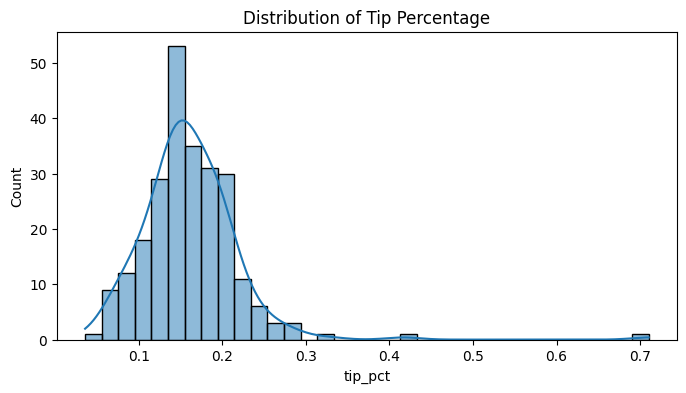

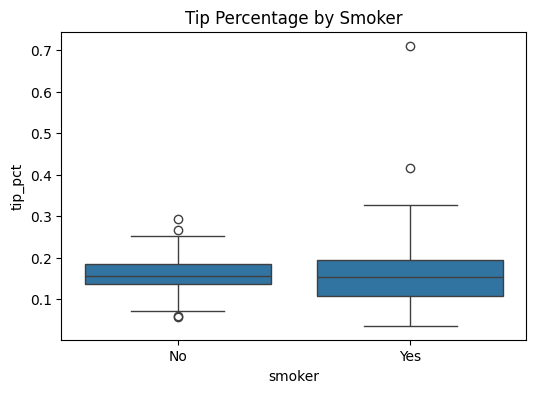

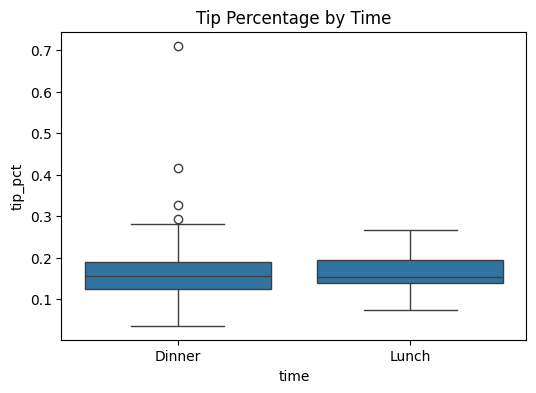

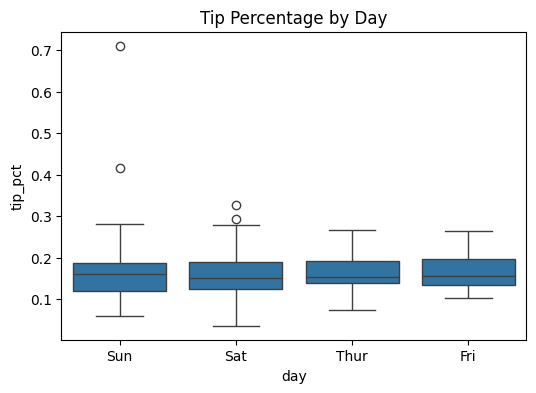

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("tips.csv")

# 1) tip_pct 만들기
df["tip_pct"] = df["tip"] / df["total_bill"]

# 2) 시각화 코드 작성

# - tip_pct 히스토그램 분포
plt.figure(figsize=(8, 4)) # 그래프 크기 조절 (선택사항)
sns.histplot(data=df, x="tip_pct", kde=True) # kde=True로 밀도 곡선 추가 추천
plt.title("Distribution of Tip Percentage")
plt.show()

# - smoker별 tip_pct boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="smoker", y="tip_pct")
plt.title("Tip Percentage by Smoker")
plt.show()

# - time별 tip_pct boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="time", y="tip_pct")
plt.title("Tip Percentage by Time")
plt.show()

# - day별 tip_pct boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="day", y="tip_pct")
plt.title("Tip Percentage by Day")
plt.show()

(2) 결론 도출 (서술형)

Q1. 둘 중 적절한 것을 고르세요.

- “EDA 결과, 팁 비율이 상대적으로 높은 그룹은 Lunch, Non-Smoker이다.”

Lunch의 중앙값이 Dinner보다 미세하게 높게 나타난다. 저녁은 금액(total_bill) 자체가 커서 팁 금액은 많지만, '비율'로 따지면 가벼운 식사를 하는 점심때가 조금 더 후한 경향이 있다.

Non-Smoker의 중앙값이 Smoker보다 높고 분포가 안정적이다. 흡연자는 팁을 아주 많이 주거나 적게 주는 편차가 크다.

Q2. 빈칸에 적절한 말을 자유롭게 서술하세요.

- “이를 통해 레스토랑 운영자는 **팁 비율이 높고 안정적인 '비흡연 구역'을 쾌적하게 관리하여 가족/일반 단위 고객의 만족도를 높이거나, '점심 시간대' 메뉴 구성을 다양화하여 회전율과 고객 유입을 늘리는** 전략을 고려할 수 있다.”